In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import io
plt.style.use('ggplot')

In [4]:
from google.colab import files
uploaded = files.upload()

Saving datatraining.txt to datatraining.txt


In [5]:
train_data = pd.read_csv(io.StringIO(uploaded['datatraining.txt'].decode('utf-8')))
train_data

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.250000,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.000000,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.500000,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.250000,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.500000,0.004757,1
...,...,...,...,...,...,...,...
8139,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
8140,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
8141,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
8142,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1


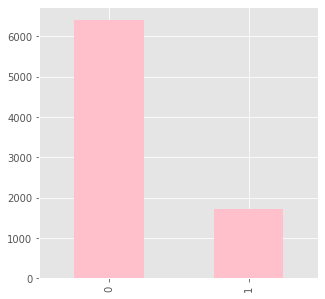

In [6]:
train_data['Occupancy'].value_counts().plot(kind='bar', color='pink',figsize=(5,5))

The number of instances of a room not occupied is more than 6000 whereas the number of instances of a room being occupied is just around 1800 

Finding out the correlation of all the features with respect to our target variable Occupancy and plotting a heat map

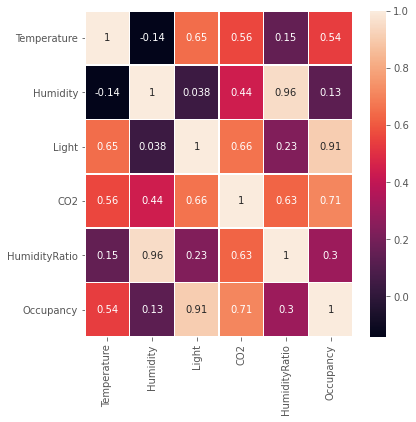

In [7]:
corrdf = train_data.corr('pearson')

fig, ax = plt.subplots(figsize=(6,6)) 
sns.heatmap(corrdf, annot=True, linewidths=.5, ax=ax)

In [8]:
corrdf['Occupancy'].sort_values()

Humidity         0.132964
HumidityRatio    0.300282
Temperature      0.538220
CO2              0.712235
Light            0.907352
Occupancy        1.000000
Name: Occupancy, dtype: float64

So Light, Temperature and CO2 are the features that are closely correlated with Occupancy. 

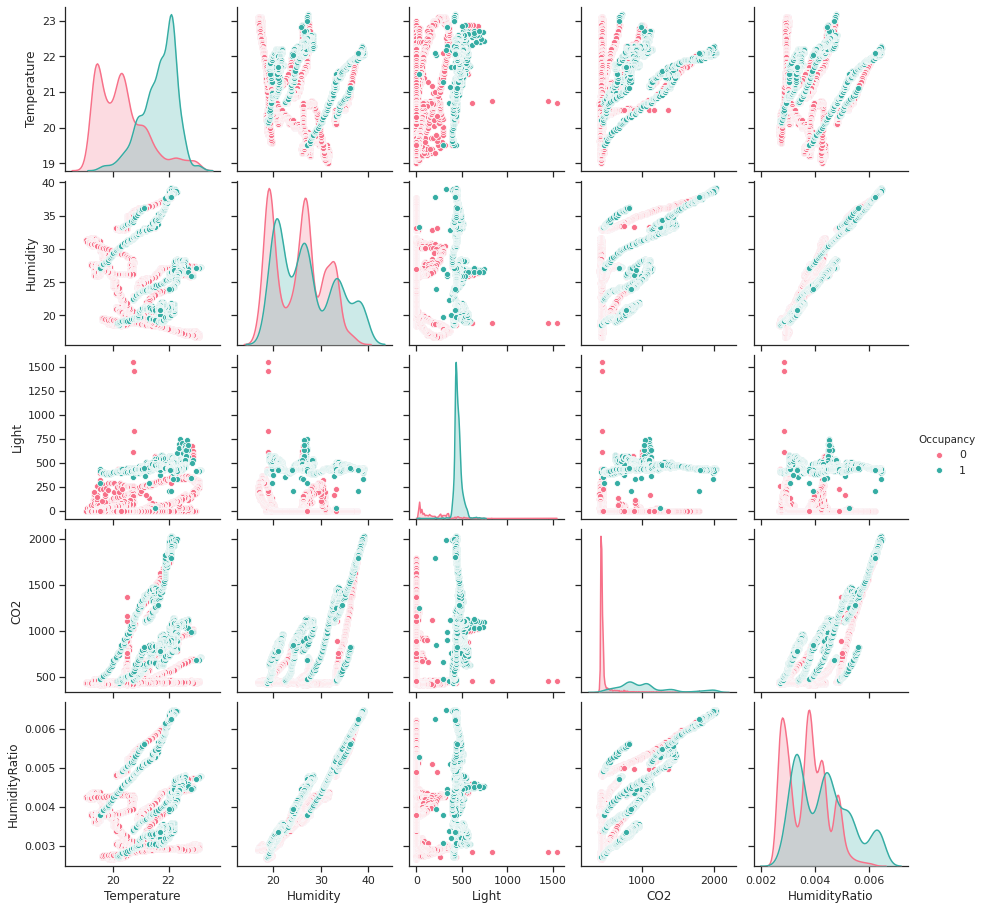

In [9]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(train_data,hue="Occupancy",palette="husl")

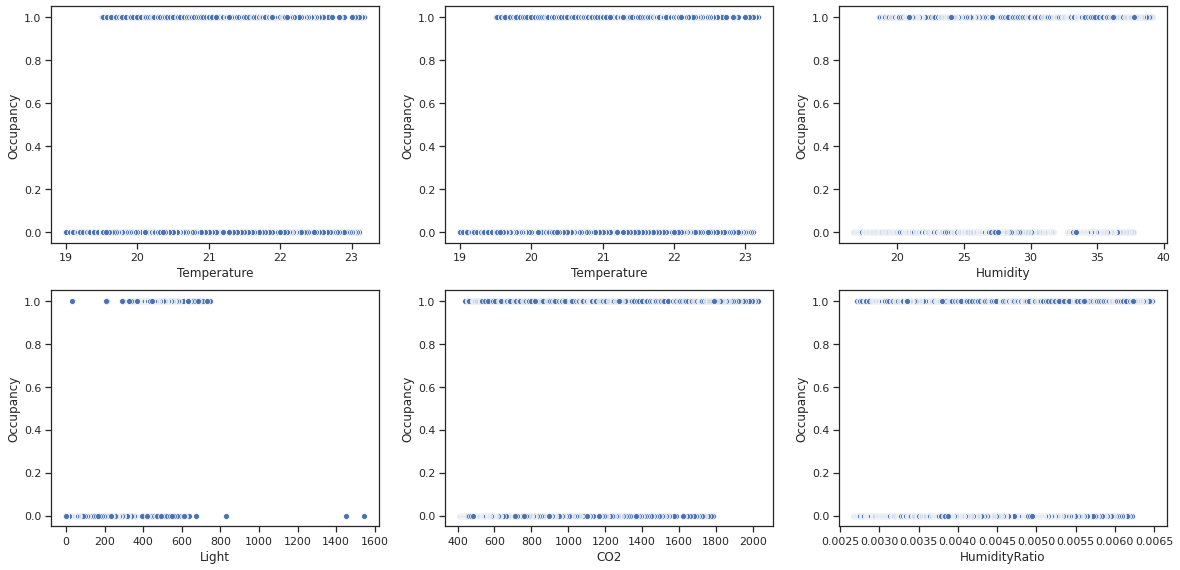

In [10]:
fig = plt.figure(figsize= (20,20))

plt.subplot(4,3,1)
sns.scatterplot(x='Temperature', y='Occupancy', data=train_data)

plt.subplot(4,3,2)
sns.scatterplot(x='Temperature', y='Occupancy', data=train_data)

plt.subplot(4,3,3)
sns.scatterplot(x='Humidity', y='Occupancy', data=train_data)

plt.subplot(4,3,4)
sns.scatterplot(x='Light', y='Occupancy', data=train_data)

plt.subplot(4,3,5)
sns.scatterplot(x='CO2', y='Occupancy', data=train_data)

plt.subplot(4,3,6)
sns.scatterplot(x='HumidityRatio', y='Occupancy', data=train_data)

From the above visualizations, it can be seen that all the features seem to be relevant with the target value, Occupancy. Awesome!


In the following notebooks, I have used Neural Networks and Logistic Regression with one variable and also with two variables to predict the class of the target (0 or 1). So go check it out!